cod_pers  _case  sm  sm_n  abdominal_ob  high_tri  low_hdl  hypertension  \
0          93      0   0     0             0         0        0             0   
1          94      0   0     2             1         0        0             1   
2         109      0   0     2             1         0        0             1   
3         111      0   0     2             0         1        0             1   
4         120      0   0     2             0         0        0             1   
..        ...    ...  ..   ...           ...       ...      ...           ...   
304       289      1   1     4             1         0        1             1   
305       291      1   1     5             1         1        1             1   
306       296      1   1     4             1         1        1             1   
307       310      1   1     4             1         1        1             1   
308       313      1   1     4             1         1        1             1   

     hyperglycemia  vit_cm  ...  rBa_plasma  rHg_plasma  rTl_plasma  \
0                0    78.2  ...   16.795504    1.122259    4.462812   
1                0    81.8  ...   13.411625    4.442817   16.697470   
2                0   104.0  ...   29.099930    0.678962   16.439056   
3                0    77.0  ...   22.805708    0.489346   15.450724   
4                1    75.0  ...    8.010287    0.730086   21.634552   
..             ...     ...  ...         ...         ...         ...   
304              1    98.0  ...   19.511747    1.794997    7.936768   
305              1   106.0  ...   28.631216    0.254311   19.828707   
306              0    97.0  ...   21.502222    1.028649   24.892687   
307              0    88.5  ...   29.735533    4.096227   14.469690   
308              0    82.1  ...   24.969570    0.920070   -0.381577   

     rPb_plasma  rU_plasma     ril10        ril6         ril8        rtnf  \
0      0.350787   2.621213  0.163380  -16.954220  -229.030350  -43.152023   
1      0.487386  11.843184  0.414396   -0.321925   671.058777  182.584534   
2      0.459506  20.444494  0.101116  -29.602127  -189.363388  -50.939148   
3      0.253391  22.018568  0.097131  -34.061062  -281.976624  -51.763596   
4      0.741788  10.164190  0.435422   21.553242   250.450836   42.874104   
..          ...        ...       ...         ...          ...         ...   
304    0.409944  13.023035  1.550080   31.658844  2032.988281  448.838348   
305    0.362664  26.810520  0.741404  690.408813  2643.594482  308.080750   
306    0.688261   9.625665  1.434986  745.639893  2177.983643  653.359497   
307    0.181365  25.139153  0.336958  -28.898808   257.367767  -27.002708   
308    0.667090   7.198497  0.055190  -32.644173  -249.076736  -54.268242   

         rpcr  
0    1.321523  
1    1.121963  
2    1.525059  
3    1.557364  
4    1.749924  
..        ...  
304  3.915213  
305  1.798019  
306  1.742586  
307  1.506779  
308  0.916725  

[271 rows x 97 columns]

In [13]:
kmeans.fit(feature)

KMeans(init='random', n_clusters=3, random_state=42)

In [14]:
# The lowest SSE value
kmeans.inertia_


# Final locations of the centroid
kmeans.cluster_centers_





# The number of iterations required to converge
kmeans.n_iter_

14

In [16]:
 len(kmeans.labels_)

271

In [17]:
len(feature)

271

In [18]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(feature)
    sse.append(kmeans.inertia_)

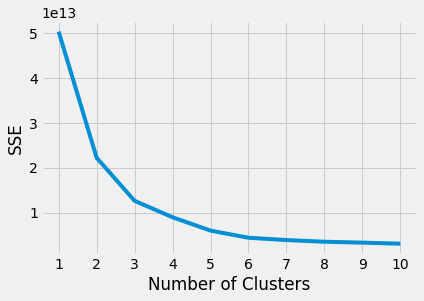

In [20]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

In [21]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(feature)
    score = silhouette_score(feature, kmeans.labels_)
    silhouette_coefficients.append(score)

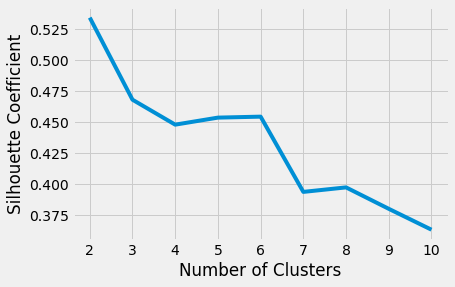

In [22]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [23]:
len(kmeans.cluster_centers_)

10

In [24]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

In [25]:
# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(feature, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(feature)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 5


In [26]:
import matplotlib.pyplot as plt

In [ ]:
#heatmap e lavoro sul dataframe

In [28]:
import numpy as np                                # For data management
import pandas as pd                               # For data management

import seaborn as sns                             # For data visualization and specifically for pairplot()
import matplotlib.pyplot as plt                   # For data visualization

from sklearn import datasets                      # To import the sample dataset
from sklearn.preprocessing import StandardScaler  # To transform the dataset
from sklearn.cluster import KMeans                # To instantiate, train and use model
from sklearn import metrics                       # For Model Evaluation


In [29]:
feature.keys()

Index(['cod_pers', '_case', 'sm', 'sm_n', 'abdominal_ob', 'high_tri',
       'low_hdl', 'hypertension', 'hyperglycemia', 'vit_cm', 'bmi', 'v6',
       'v126', 'v245', 'vn21', 'pasta', 'verdure_med', 'fruit', 'legumi',
       'olio_oliva', 'pesce', 'burro', 'red_meat', 'patate', 'mscore', 'gl',
       'igm', 'rcol', 'rglu', 'rtri', 'rhdl', 'rfsh', 'rlh', 'rpg', 'rtts',
       'rfts', 'rins', 'rshbg', 'rigf_1', 'rigf_bp3', 're2_orion', 'rAl_urine',
       'rTi_urine', 'rV_urine', 'rCr_urine', 'rMn_urine', 'rFe_urine',
       'rCo_urine', 'rNi_urine', 'rCu_urine', 'rZn_urine', 'rAs_urine',
       'rSe_urine', 'rRb_urine', 'rSr_urine', 'rMo_urine', 'rCd_urine',
       'rSn_urine', 'rI_urine', 'rCs_urine', 'rBa_urine', 'rHg_urine',
       'rTl_urine', 'rPb_urine', 'rU_urine', 'rMg_plasma', 'rAl_plasma',
       'rK_plasma', 'rCa_plasma', 'rTi_plasma', 'rV_plasma', 'rCr_plasma',
       'rMn_plasma', 'rFe_plasma', 'rCo_plasma', 'rNi_plasma', 'rCu_plasma',
       'rZn_plasma', 'rAs_plasma', 'rS

In [39]:
dataframe = (feature.drop(columns=['cod_pers', '_case', 'sm' , 'sm_n' , 'abdominal_ob' , 'high_tri' , 'low_hdl' , 'hypertension' , 'hyperglycemia']))

In [40]:
dataframe.head()

vit_cm        bmi  v6  v126  v245    vn21      pasta  verdure_med  \
0    78.2  24.706322  51   2.0   2.0  14.541  30.400000   149.500000   
1    81.8  24.247459  57   2.0   9.0   6.500  27.900000   224.000000   
2   104.0  31.093750  63   4.0   9.0  13.000  31.600000   113.699997   
3    77.0  28.797264  65   2.0   9.0   0.000  59.799999   105.300003   
4    75.0  25.626390  58   2.0   9.0  13.000  23.600000   118.199997   

        fruit  legumi  ...  rBa_plasma  rHg_plasma  rTl_plasma  rPb_plasma  \
0  391.399994    12.9  ...   16.795504    1.122259    4.462812    0.350787   
1   82.699997    22.6  ...   13.411625    4.442817   16.697470    0.487386   
2  167.800003     9.1  ...   29.099930    0.678962   16.439056    0.459506   
3  120.500000    17.4  ...   22.805708    0.489346   15.450724    0.253391   
4   30.500000     3.2  ...    8.010287    0.730086   21.634552    0.741788   

   rU_plasma     ril10       ril6        ril8        rtnf      rpcr  
0   2.621213  0.163380 -16.954220 -229.030350  -43.152023  1.321523  
1  11.843184  0.414396  -0.321925  671.058777  182.584534  1.121963  
2  20.444494  0.101116 -29.602127 -189.363388  -50.939148  1.525059  
3  22.018568  0.097131 -34.061062 -281.976624  -51.763596  1.557364  
4  10.164190  0.435422  21.553242  250.450836   42.874104  1.749924  

[5 rows x 88 columns]

In [41]:
len(dataframe)

271

In [42]:
dataframe.corr()

vit_cm       bmi        v6      v126      v245      vn21     pasta  \
vit_cm  1.000000  0.896072  0.142719  0.181313  0.101453 -0.018970 -0.009056   
bmi     0.896072  1.000000  0.142983  0.172577  0.086144 -0.056719 -0.029487   
v6      0.142719  0.142983  1.000000 -0.106883  0.147881  0.030026 -0.152006   
v126    0.181313  0.172577 -0.106883  1.000000  0.063086  0.002774  0.081919   
v245    0.101453  0.086144  0.147881  0.063086  1.000000 -0.173356  0.087505   
...          ...       ...       ...       ...       ...       ...       ...   
ril10  -0.022270 -0.011292  0.011974 -0.097056 -0.106682 -0.097409 -0.013575   
ril6    0.022821 -0.031188  0.002555  0.014121  0.002456 -0.095614 -0.100318   
ril8   -0.038428 -0.088005 -0.012453  0.019891  0.042786 -0.077468 -0.059647   
rtnf   -0.075838 -0.104877 -0.017748  0.021155 -0.025427 -0.075528 -0.046101   
rpcr    0.221736  0.225628  0.002798 -0.051447 -0.069872 -0.053620 -0.002850   

        verdure_med     fruit    legumi  ...  rBa_plasma  rHg_plasma  \
vit_cm     0.228011 -0.062938  0.073297  ...    0.014020   -0.028306   
bmi        0.234795 -0.067378  0.033081  ...    0.018427   -0.022902   
v6        -0.099062  0.002531  0.007464  ...    0.033443   -0.015147   
v126       0.044565 -0.022516  0.100314  ...   -0.038326   -0.042409   
v245       0.024446  0.047942  0.203038  ...    0.053262   -0.005245   
...             ...       ...       ...  ...         ...         ...   
ril10      0.046699 -0.021115 -0.037868  ...    0.024115    0.054562   
ril6      -0.036164  0.057016  0.053203  ...    0.062081    0.066407   
ril8       0.000404  0.094271 -0.029557  ...    0.036048    0.124659   
rtnf      -0.053929  0.038332 -0.047144  ...   -0.070060    0.185477   
rpcr      -0.047347 -0.106983  0.021206  ...    0.054607    0.022146   

        rTl_plasma  rPb_plasma  rU_plasma     ril10      ril6      ril8  \
vit_cm    0.046223   -0.022604   0.104944 -0.022270  0.022821 -0.038428   
bmi       0.087457   -0.060460   0.114102 -0.011292 -0.031188 -0.088005   
v6       -0.004535   -0.005054   0.044454  0.011974  0.002555 -0.012453   
v126      0.135504    0.019543   0.039294 -0.097056  0.014121  0.019891   
v245      0.020576    0.009611   0.122181 -0.106682  0.002456  0.042786   
...            ...         ...        ...       ...       ...       ...   
ril10    -0.011828    0.014174   0.044980  1.000000  0.317887  0.317540   
ril6     -0.026609   -0.020169   0.020570  0.317887  1.000000  0.749572   
ril8     -0.023657    0.029304   0.082369  0.317540  0.749572  1.000000   
rtnf     -0.006422    0.038746   0.065840  0.365914  0.684083  0.758042   
rpcr     -0.049318   -0.063587  -0.021995  0.241798 -0.031986 -0.058749   

            rtnf      rpcr  
vit_cm -0.075838  0.221736  
bmi    -0.104877  0.225628  
v6     -0.017748  0.002798  
v126    0.021155 -0.051447  
v245   -0.025427 -0.069872  
...          ...       ...  
ril10   0.365914  0.241798  
ril6    0.684083 -0.031986  
ril8    0.758042 -0.058749  
rtnf    1.000000 -0.085240  
rpcr   -0.085240  1.000000  

[88 rows x 88 columns]

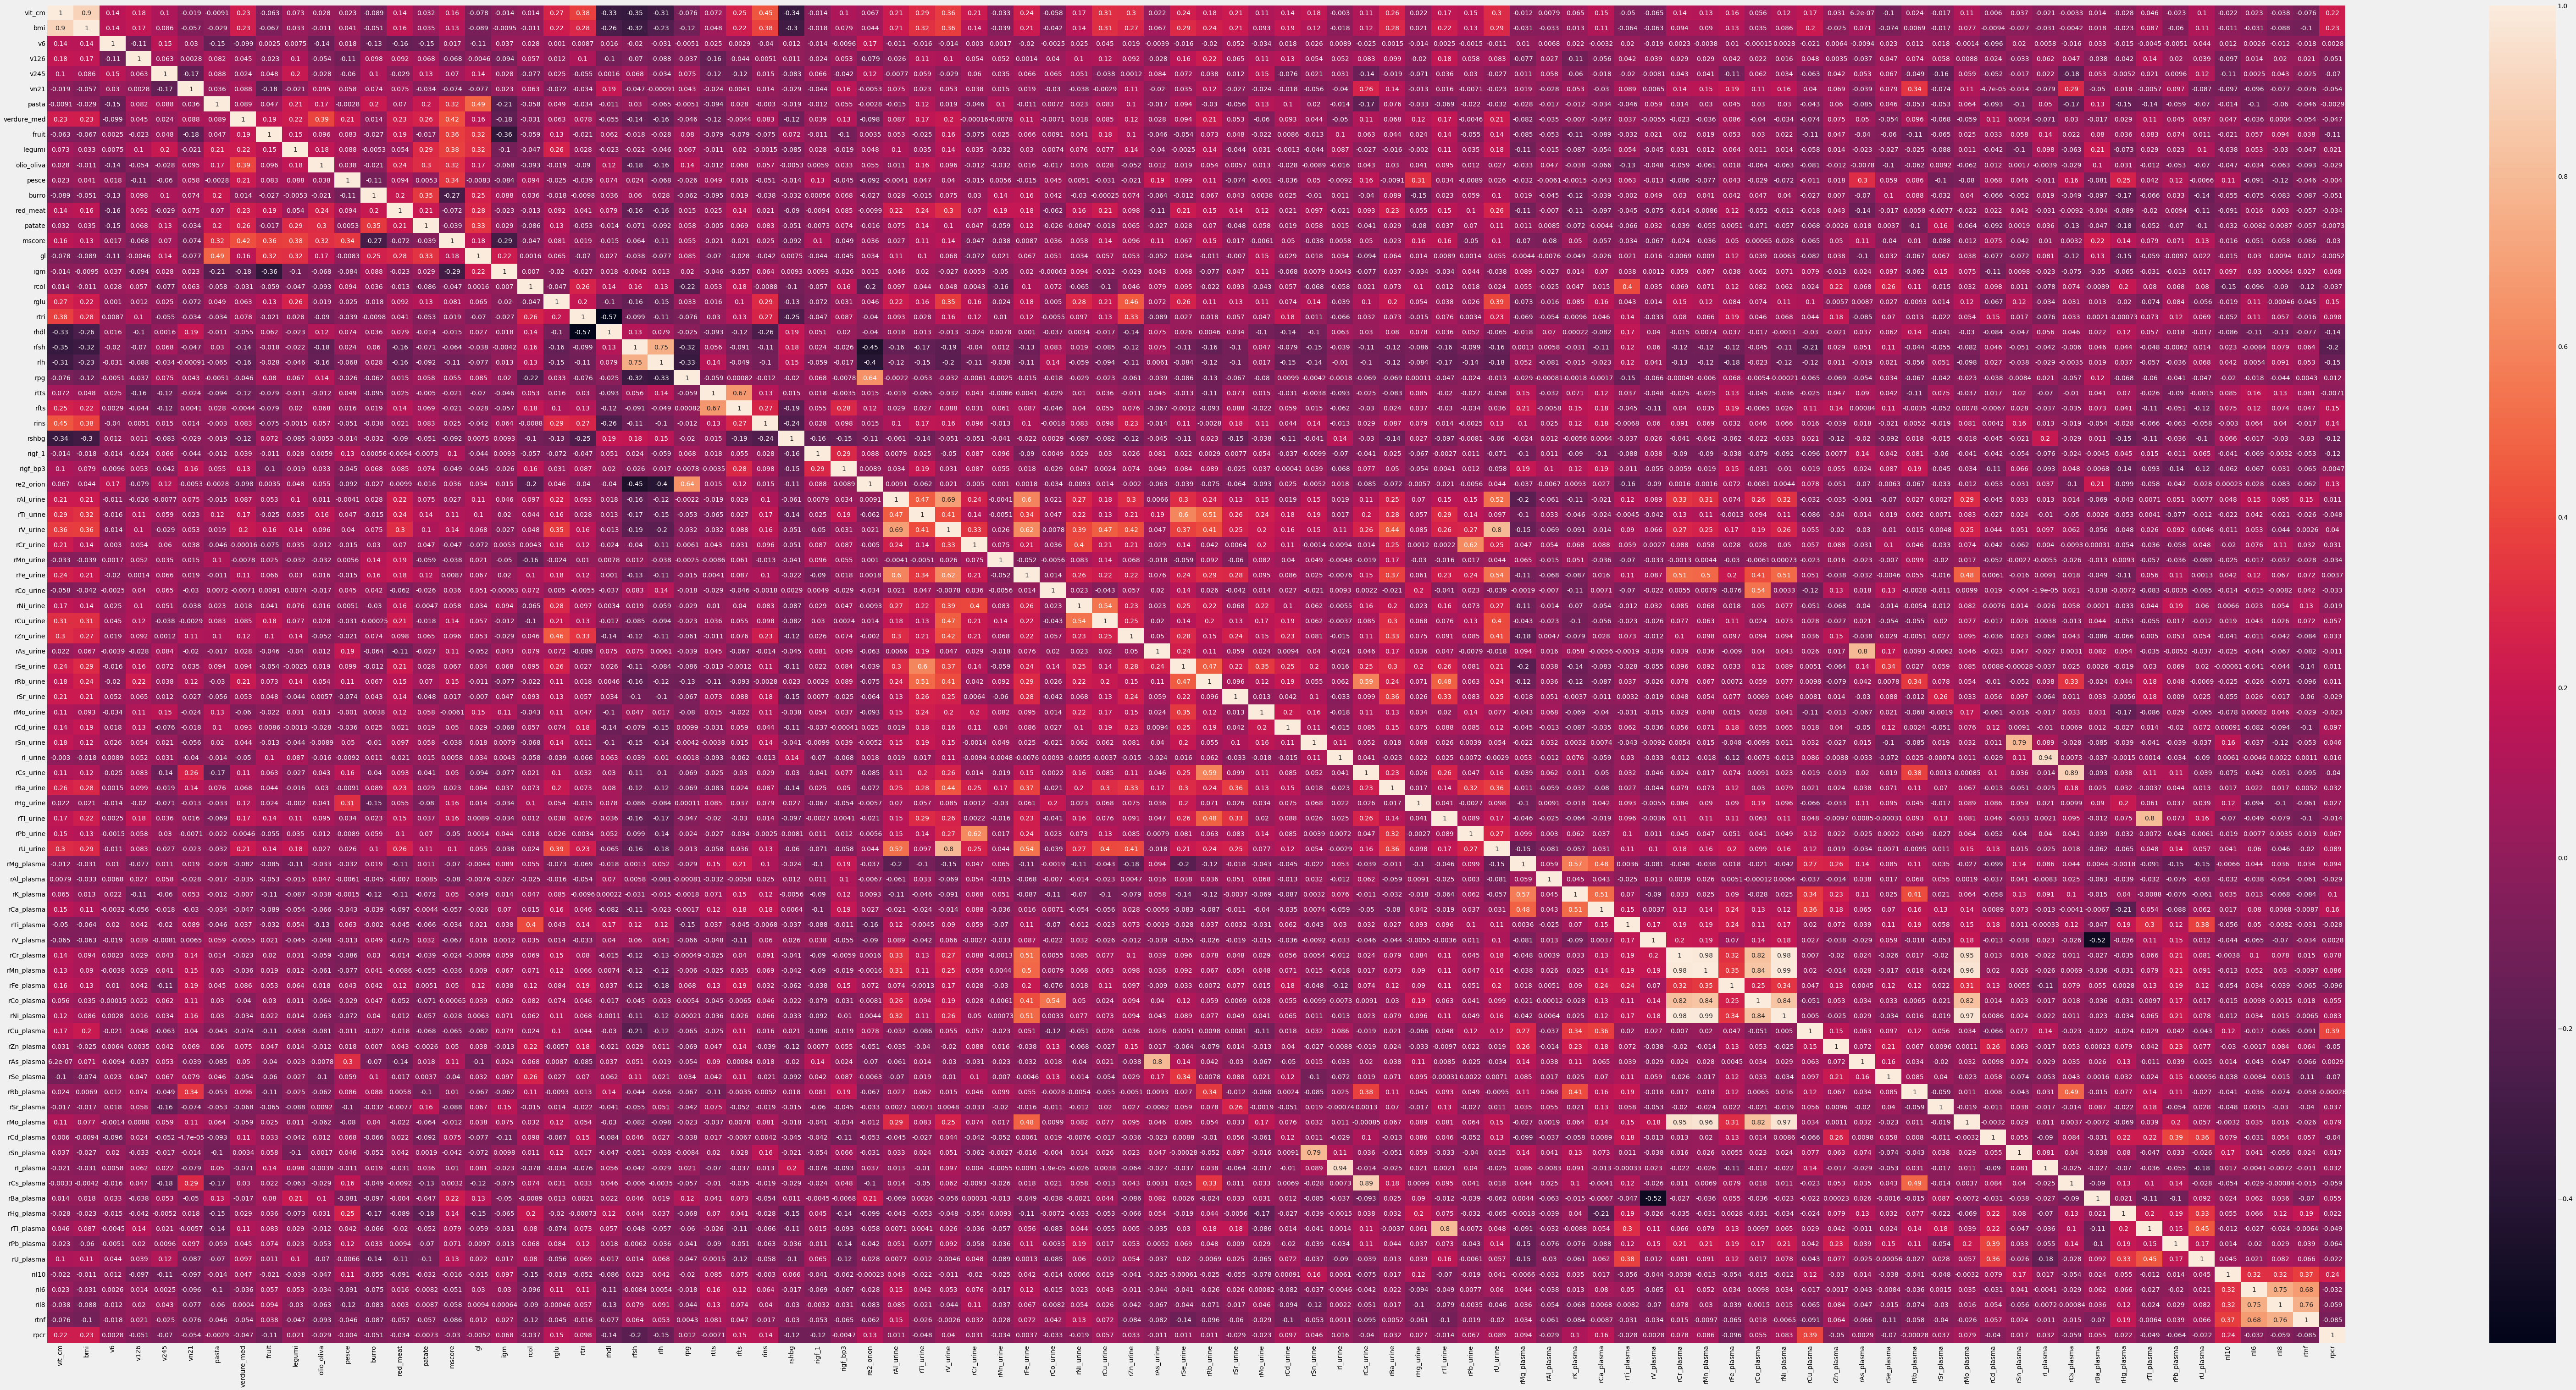

In [44]:
plt.figure(figsize = (100,50))
sns.heatmap( dataframe.corr(), annot=True)

In [45]:
scaler = StandardScaler()


In [46]:
scaled_array = scaler.fit_transform(dataframe)


In [47]:
scaled_dataframe = pd.DataFrame( scaled_array, columns = dataframe.columns )


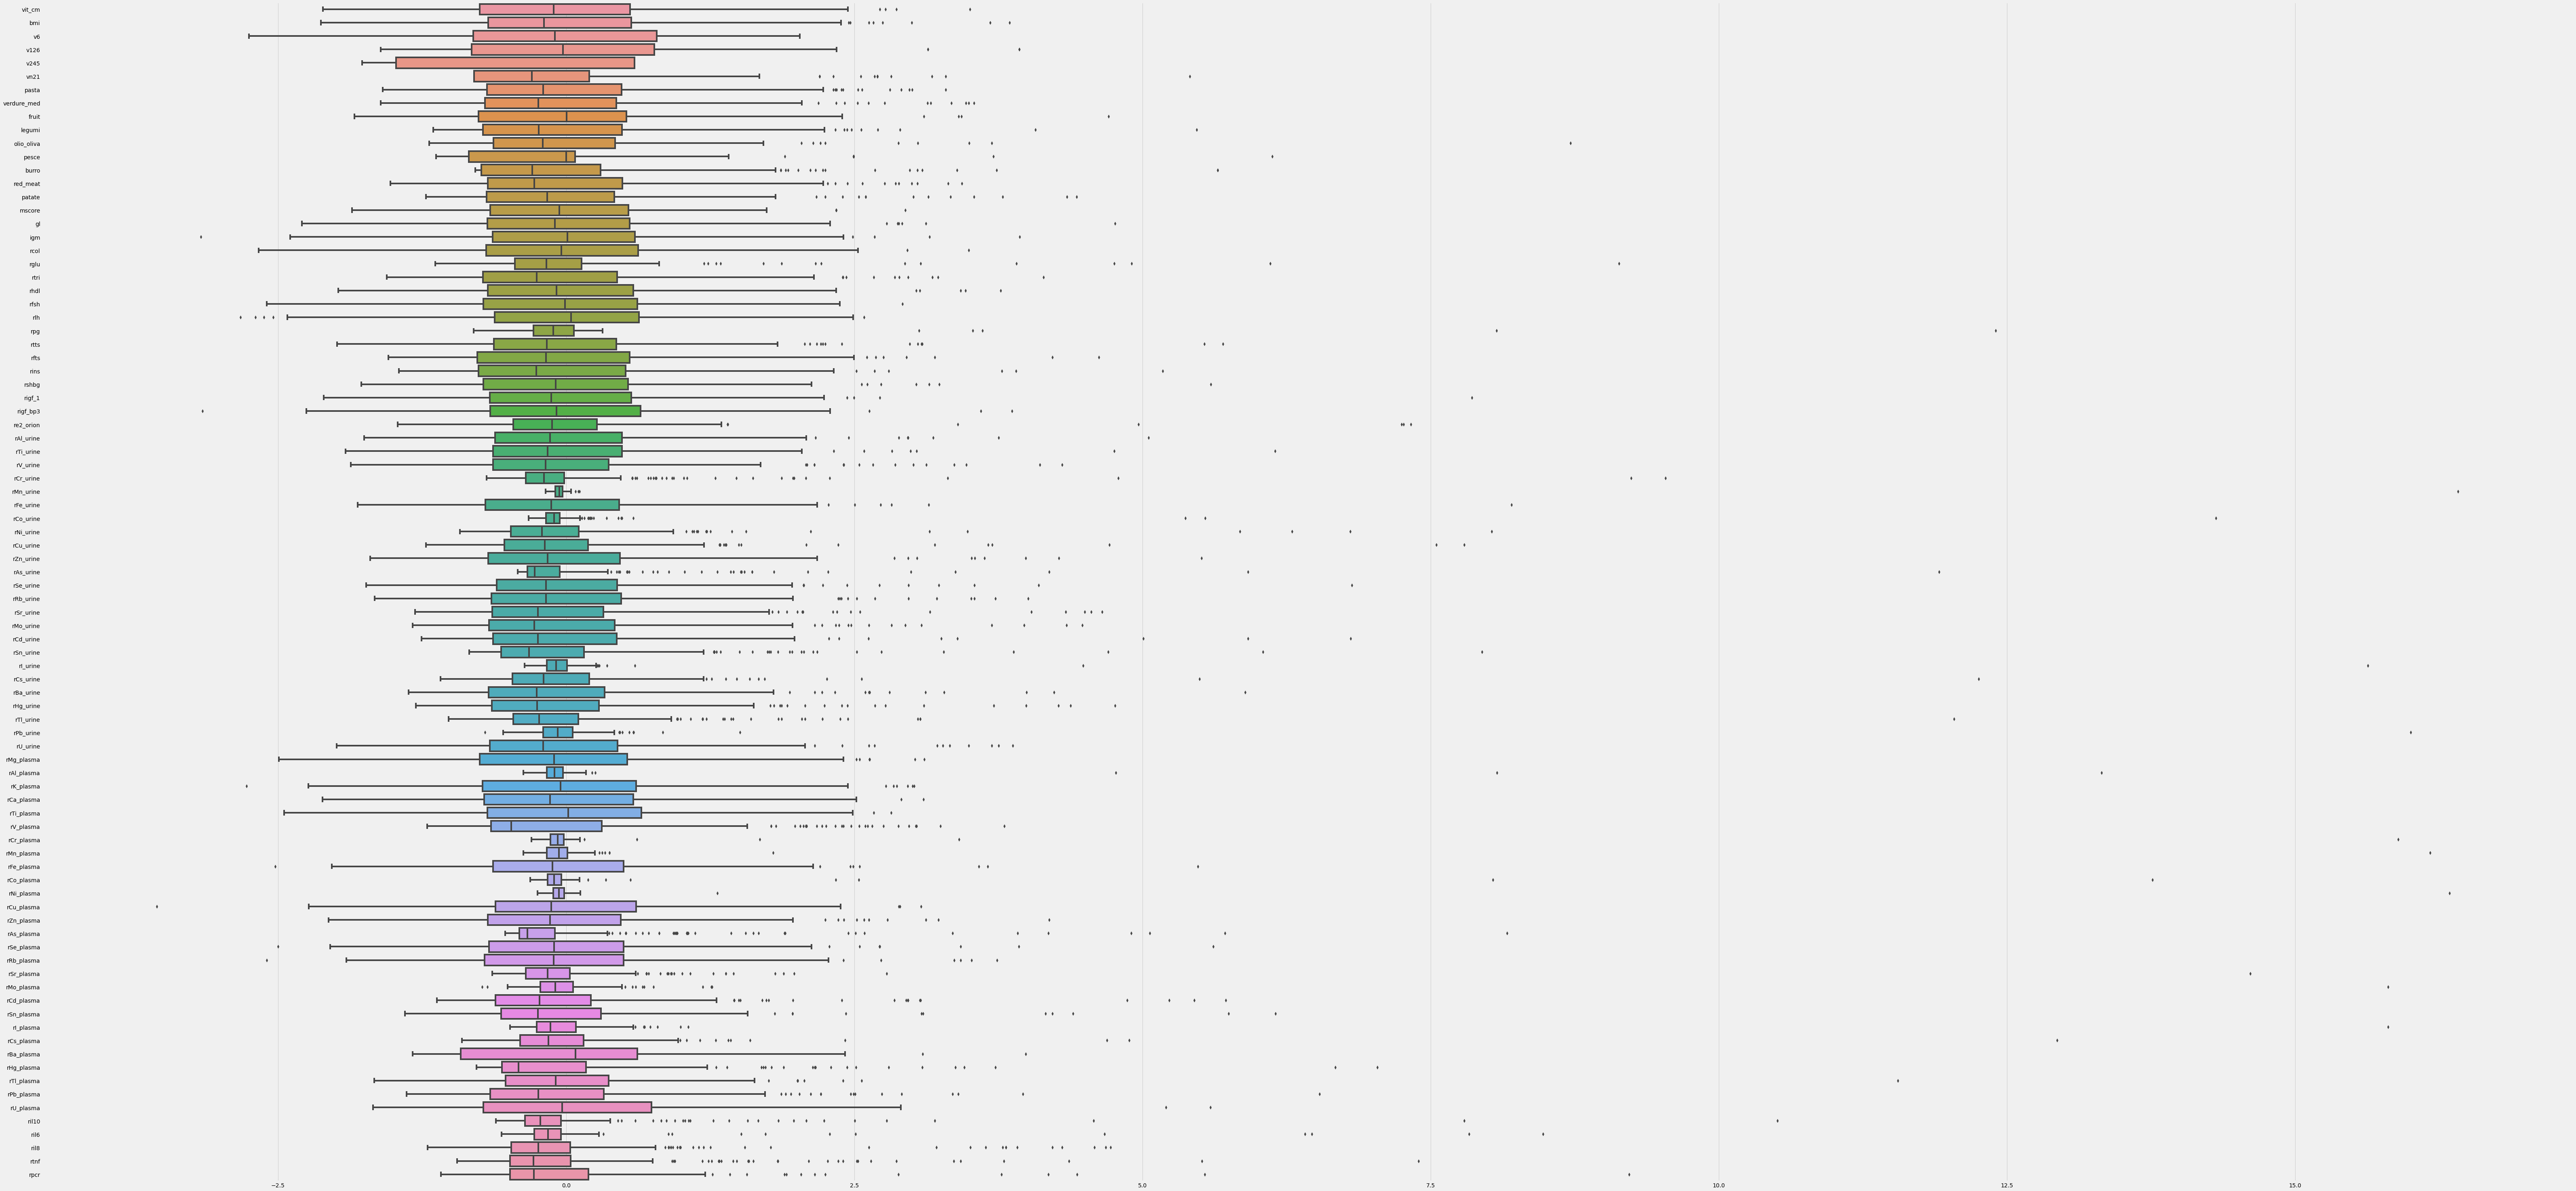

In [51]:
#boxplot

plt.figure(figsize = (100,50))
sns.boxplot(data = scaled_dataframe, orient = "h")
plt.show()

In [52]:
kmeans_model = KMeans(n_clusters = 5)

In [53]:
kmeans_model.fit(scaled_dataframe)


KMeans(n_clusters=5)

In [54]:
centroids = kmeans_model.cluster_centers_
centroids

array([[ 6.98970359e-01,  6.82724209e-01,  3.52222545e-03,
         3.91810581e-01,  4.23032790e-02,  8.82206292e-02,
         8.93998645e-02,  7.05634197e-01,  3.98756717e-01,
         4.16120499e-01,  3.95326289e-01,  2.29416303e-01,
        -7.20715848e-02,  6.71793700e-01,  3.24959526e-01,
         5.30858125e-01,  2.89435340e-01, -1.32871141e-01,
         2.18764546e-02,  5.60591530e-01,  3.50922624e-01,
        -9.58645070e-02, -3.92567589e-01, -3.62405744e-01,
        -4.83129986e-02, -9.32495495e-02,  4.44381666e-02,
         2.21069966e-01, -2.08303350e-01, -1.61278692e-01,
         8.46976835e-02, -7.66757220e-02,  8.27841519e-01,
         9.25979617e-01,  1.26033250e+00,  5.20358898e-01,
        -4.06381321e-02,  7.18224855e-01, -1.62792948e-04,
         6.77744174e-01,  6.64305468e-01,  8.39964856e-01,
         3.87423538e-02,  8.93647278e-01,  9.96079346e-01,
         4.80715460e-01,  5.39641425e-01,  4.00932911e-01,
         5.61493421e-01, -1.32911489e-02,  7.36113633e-0

In [55]:
kmeans_model.cluster_centers_.shape

(5, 88)

In [57]:
kmeans_model.labels_

array([3, 2, 0, 3, 3, 2, 2, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 2, 0, 3, 2,
       3, 2, 0, 0, 3, 2, 0, 2, 2, 4, 2, 3, 3, 0, 0, 3, 2, 3, 2, 2, 2, 2,
       2, 2, 0, 3, 2, 2, 2, 3, 2, 2, 2, 2, 0, 3, 3, 2, 3, 3, 2, 3, 2, 0,
       2, 3, 3, 2, 2, 2, 2, 3, 0, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 0, 3, 2, 3, 2, 3, 3, 2, 3, 3,
       3, 0, 3, 0, 2, 3, 2, 3, 2, 0, 3, 2, 2, 2, 2, 0, 0, 3, 2, 2, 2, 2,
       3, 3, 2, 3, 3, 0, 2, 0, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 0, 3,
       2, 3, 2, 2, 3, 0, 2, 2, 3, 0, 2, 2, 3, 2, 2, 2, 2, 3, 3, 2, 3, 2,
       0, 3, 3, 2, 2, 3, 0, 2, 3, 2, 3, 2, 2, 3, 3, 0, 3, 3, 2, 0, 3, 2,
       2, 3, 0, 3, 3, 1, 3, 3, 0, 0, 3, 3, 3, 3, 2, 0, 3, 2, 0, 0, 3, 3,
       3, 0, 3, 0, 3, 3, 3, 3, 3, 0, 0, 0, 2, 0, 3, 0, 0, 3, 3, 3, 3, 0,
       3, 3, 2, 0, 2, 3, 3, 3, 3, 3, 0, 3, 0, 2, 3, 0, 0, 3, 3, 0, 3, 3,
       3, 0, 3, 0, 2, 3, 3], dtype=int32)

In [59]:
dataframe["cluster"] = kmeans_model.labels_

In [63]:
dataframe

vit_cm        bmi  v6  v126  v245    vn21       pasta  verdure_med  \
0      78.2  24.706322  51   2.0   2.0  14.541   30.400000   149.500000   
1      81.8  24.247459  57   2.0   9.0   6.500   27.900000   224.000000   
2     104.0  31.093750  63   4.0   9.0  13.000   31.600000   113.699997   
3      77.0  28.797264  65   2.0   9.0   0.000   59.799999   105.300003   
4      75.0  25.626390  58   2.0   9.0  13.000   23.600000   118.199997   
..      ...        ...  ..   ...   ...     ...         ...          ...   
304    98.0  32.481167  53   3.0   9.0   0.000  117.300003   281.300018   
305   106.0  32.082424  59   4.0   9.0   0.000   24.400000   254.700012   
306    97.0  29.979252  63   2.0   9.0   0.000    1.400000   107.099998   
307    88.5  26.720516  68   1.0   9.0   6.500   29.900000    88.699997   
308    82.1  28.319344  64   2.0   9.0   0.000   20.799999   151.099991   

          fruit     legumi  ...  rHg_plasma  rTl_plasma  rPb_plasma  \
0    391.399994  12.900000  ...    1.122259    4.462812    0.350787   
1     82.699997  22.600000  ...    4.442817   16.697470    0.487386   
2    167.800003   9.100000  ...    0.678962   16.439056    0.459506   
3    120.500000  17.400000  ...    0.489346   15.450724    0.253391   
4     30.500000   3.200000  ...    0.730086   21.634552    0.741788   
..          ...        ...  ...         ...         ...         ...   
304  152.899994   4.100000  ...    1.794997    7.936768    0.409944   
305  202.699997  49.299999  ...    0.254311   19.828707    0.362664   
306  399.500000   9.000000  ...    1.028649   24.892687    0.688261   
307  177.899994  19.100000  ...    4.096227   14.469690    0.181365   
308  125.000000   5.500000  ...    0.920070   -0.381577    0.667090   

     rU_plasma     ril10        ril6         ril8        rtnf      rpcr  \
0     2.621213  0.163380  -16.954220  -229.030350  -43.152023  1.321523   
1    11.843184  0.414396   -0.321925   671.058777  182.584534  1.121963   
2    20.444494  0.101116  -29.602127  -189.363388  -50.939148  1.525059   
3    22.018568  0.097131  -34.061062  -281.976624  -51.763596  1.557364   
4    10.164190  0.435422   21.553242   250.450836   42.874104  1.749924   
..         ...       ...         ...          ...         ...       ...   
304  13.023035  1.550080   31.658844  2032.988281  448.838348  3.915213   
305  26.810520  0.741404  690.408813  2643.594482  308.080750  1.798019   
306   9.625665  1.434986  745.639893  2177.983643  653.359497  1.742586   
307  25.139153  0.336958  -28.898808   257.367767  -27.002708  1.506779   
308   7.198497  0.055190  -32.644173  -249.076736  -54.268242  0.916725   

     cluster  
0          3  
1          2  
2          0  
3          3  
4          3  
..       ...  
304        3  
305        0  
306        2  
307        3  
308        3  

[271 rows x 89 columns]

In [ ]:
sns.pairplot(data = dataframe, hue = "cluster", palette = "Accent_r")
plt.show()

In [64]:
dataframe.to_excel(r'data_clusters.xlsx', sheet_name='dati_clusterizzati', index=False)

In [70]:
#silhouette

k_to_test = range(2,25,1) # [2,3,4, ..., 24]
silhouette_scores = {}

for k in k_to_test:
    model_kmeans_k = KMeans( n_clusters = k )
    model_kmeans_k.fit(scaled_dataframe)
    labels_k = model_kmeans_k.labels_
    score_k = metrics.silhouette_score(scaled_dataframe, labels_k)
    silhouette_scores[k] = score_k
    print("Tested kMeans with k = %d\tSS: %5.4f" % (k, score_k))
    
print("Done!")

Tested kMeans with k = 2	SS: 0.1427
Tested kMeans with k = 3	SS: 0.0928
Tested kMeans with k = 4	SS: 0.0495
Tested kMeans with k = 5	SS: 0.0239
Tested kMeans with k = 6	SS: 0.0177
Tested kMeans with k = 7	SS: 0.0097
Tested kMeans with k = 8	SS: 0.0023
Tested kMeans with k = 9	SS: 0.0012
Tested kMeans with k = 10	SS: 0.0184
Tested kMeans with k = 11	SS: 0.0256
Tested kMeans with k = 12	SS: 0.0219
Tested kMeans with k = 13	SS: 0.0020
Tested kMeans with k = 14	SS: 0.0049
Tested kMeans with k = 15	SS: 0.0148
Tested kMeans with k = 16	SS: 0.0193
Tested kMeans with k = 17	SS: 0.0185
Tested kMeans with k = 18	SS: 0.0053
Tested kMeans with k = 19	SS: 0.0184
Tested kMeans with k = 20	SS: 0.0205
Tested kMeans with k = 21	SS: 0.0114
Tested kMeans with k = 22	SS: 0.0164
Tested kMeans with k = 23	SS: 0.0139
Tested kMeans with k = 24	SS: 0.0196
Done!
